In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
drug_data = pd.read_csv(clinical_trial_data_to_load)
drug_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
merge_data = pd.merge(mouse_data, drug_data, on="Mouse ID",how="outer")

In [5]:
# Display the data table for preview
merge_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_drug = merge_data.groupby(["Drug","Timepoint"])
mean_groupby_drug = group_drug["Tumor Volume (mm3)"].mean()

In [7]:
# Convert to DataFrame
mean_by_drug = pd.DataFrame(mean_groupby_drug)
mean_by_drug = mean_by_drug.reset_index()

In [8]:
# Preview DataFrame
mean_by_drug.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = group_drug["Tumor Volume (mm3)"].sem()
standard_error.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error)
standard_error_df = standard_error_df.reset_index()

In [11]:
# Preview DataFrame
standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mean_by_drug_pivot = pd.pivot_table(mean_by_drug, values="Tumor Volume (mm3)", index=["Timepoint"],
                                   columns=["Drug"])


# Preview that Reformatting worked
mean_by_drug_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
standard_error_pivot = pd.pivot_table(standard_error_df, values="Tumor Volume (mm3)", index=["Timepoint"],
                                     columns="Drug")

standard_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [14]:
mean_by_drug_pivot.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

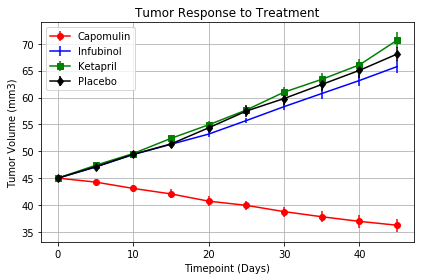

In [15]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(mean_by_drug_pivot.index, mean_by_drug_pivot["Capomulin"], yerr=standard_error_pivot["Capomulin"], 
           marker="o", color="red", label="Capomulin")
ax.errorbar(mean_by_drug_pivot.index, mean_by_drug_pivot["Infubinol"], yerr=standard_error_pivot["Infubinol"], 
           marker="", color="blue", label="Infubinol")
ax.errorbar(mean_by_drug_pivot.index, mean_by_drug_pivot["Ketapril"], yerr=standard_error_pivot["Ketapril"], 
           marker="s", color="green", label="Ketapril")
ax.errorbar(mean_by_drug_pivot.index, mean_by_drug_pivot["Placebo"], yerr=standard_error_pivot["Placebo"], 
           marker="d", color="black", label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

plt.grid()

# Save the Figure
plt.tight_layout()
plt.savefig("Images/Tumor Response to Treatment.png")

In [16]:
# Save the Figure
plt.tight_layout()
plt.savefig("Images/Tumor Resopnse to Treatement.png")

<Figure size 432x288 with 0 Axes>

In [17]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_site = group_drug["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastatic_site_df = pd.DataFrame(mean_metastatic_site)

# Preview DataFrame
mean_metastatic_site_df = mean_metastatic_site_df.reset_index()
mean_metastatic_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_metastatic_site = group_drug["Metastatic Sites"].sem()

# Convert to DataFrame
standard_error_metastatic_site = pd.DataFrame(standard_error_metastatic_site)

# Preview DataFrame
standard_error_metastatic_site = standard_error_metastatic_site.reset_index()
standard_error_metastatic_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_pivot = pd.pivot_table(mean_metastatic_site_df, values="Metastatic Sites", index="Timepoint", 
                                      columns="Drug")

# Preview that Reformatting worked
mean_metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [21]:
standard_error_metastatic_pivot = pd.pivot_table(standard_error_metastatic_site, values="Metastatic Sites", index="Timepoint",
                                                columns="Drug")

standard_error_metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [22]:
mean_metastatic_pivot.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

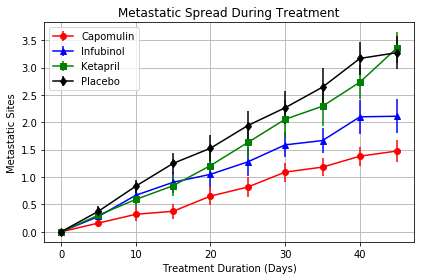

In [23]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(mean_metastatic_pivot.index, mean_metastatic_pivot["Capomulin"], yerr=standard_error_metastatic_pivot["Capomulin"], 
           marker="o", color="red", label="Capomulin")
ax.errorbar(mean_metastatic_pivot.index, mean_metastatic_pivot["Infubinol"], yerr=standard_error_metastatic_pivot["Infubinol"], 
           marker="^", color="blue", label="Infubinol")
ax.errorbar(mean_metastatic_pivot.index, mean_metastatic_pivot["Ketapril"], yerr=standard_error_metastatic_pivot["Ketapril"], 
           marker="s", color="green", label="Ketapril")
ax.errorbar(mean_metastatic_pivot.index, mean_metastatic_pivot["Placebo"], yerr=standard_error_metastatic_pivot["Placebo"], 
           marker="d", color="black", label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")

plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.tight_layout()
plt.savefig("Images/Metastatic Spread During Treatment.png")


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = group_drug["Mouse ID"].count()
mouse_count

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)

# Preview DataFrame
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID": "Mouse Count"})
mouse_count_df = mouse_count_df.reset_index()
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = pd.pivot_table(mouse_count_df, values="Mouse Count", index="Timepoint", columns="Drug")

# Preview the Data Frame
mouse_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [26]:
mouse_count_pivot.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

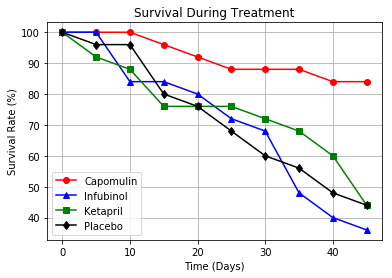

In [27]:
# Generate the Plot (Accounting for percentages)
plt.plot(mouse_count_pivot.index, ((mouse_count_pivot.loc[:,"Capomulin"])  / (mouse_count_pivot.loc[:,"Capomulin"].max()) * 100),
         color="red", marker="o", label="Capomulin")
plt.plot(mouse_count_pivot.index, ((mouse_count_pivot.loc[:,"Infubinol"])  / (mouse_count_pivot.loc[:,"Infubinol"].max()) * 100),
         color="blue", marker="^", label="Infubinol")         
plt.plot(mouse_count_pivot.index, ((mouse_count_pivot.loc[:,"Ketapril"])  / (mouse_count_pivot.loc[:,"Ketapril"].max()) * 100),
         color="green", marker="s", label="Ketapril")
plt.plot(mouse_count_pivot.index, ((mouse_count_pivot.loc[:,"Placebo"])  / (mouse_count_pivot.loc[:,"Placebo"].max()) * 100),
         color="black", marker="d", label="Placebo")

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.savefig("Images/Survival During Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [28]:
# Calculate the percent changes for each drug 

percent_change = ((mean_by_drug_pivot.loc[45]) - (mean_by_drug_pivot.loc[0])) / mean_by_drug_pivot.loc[0] * 100

# Display the data to confirm
percent_change = round(percent_change,2)
percent_change

Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

In [29]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = (percent_change[0], percent_change[2], percent_change[3], percent_change[5])
percent_change_tuple


# Splice the data between passing and failing drugs
drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
passing_drug_index = []
failing_drug_index = []
passing_drug = []
failing_drug = []
passing_drug_percent = []
failing_drug_percent = []

for x in range(len(percent_change_tuple)):
    if x > 0:
        passing_drug_index.append(x)
    else:
        failing_drug_index.append(x)

for y in passing_drug_index:
    passing_drug.append(drug_list[y])
    passing_drug_percent.append(percent_change_tuple[y])
    
for z in failing_drug_index:
    failing_drug.append(drug_list[z])
    failing_drug_percent.append(percent_change_tuple[z])

passing_zip = zip(passing_drug, passing_drug_percent)
failing_zip = zip(failing_drug, failing_drug_percent)        

In [30]:
passing_drug_index

[1, 2, 3]

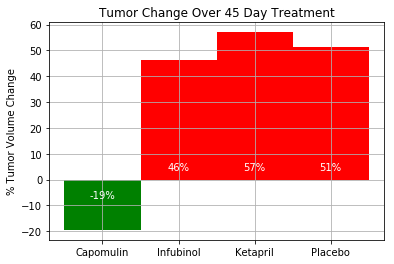

In [31]:
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()


passing = ax.bar(passing_drug_index, passing_drug_percent, color="r",alpha=1, width=1, align="center")
failing = ax.bar(failing_drug_index, failing_drug_percent, color="g", alpha=1, width=1, align="center")

ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(drug_list)
ax.grid()

# Use functions to label the percentages of changes
def percentlabelpass(drugs):
    for drug in drugs:
        height = drug.get_height()
        ax.text(drug.get_x()+drug.get_width()/2.,3,"%d%%" % int(height), ha="center", va="bottom", color="white")

def percentlabelfail(drugs):
    for drug in drugs:
        height = drug.get_height()
        ax.text(drug.get_x()+drug.get_width()/2.,-8,"%d%%" % int(height), ha="center", va="bottom", color="white")


# Call functions to implement the function calls
percentlabelpass(passing)
percentlabelfail(failing)

# Save the Figure
plt.savefig("Images/Tumor Change Over 45 Days.png")


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)